In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/starbucks.csv", index_col="Date", parse_dates=True)

In [3]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [4]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [5]:
# dailt ---> yearly
df.resample(rule="A").std()

,Close,Volume
Date,,
2015-12-31,6.076922,4.093368e+06
2016-12-31,1.958114,3.936798e+06
2017-12-31,2.415526,4.690972e+06
2018-12-31,4.678178,6.465358e+06


In [6]:
def first_day(entry):
    if len(entry):
        return entry[0]

In [7]:
df.resample(rule="A").apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


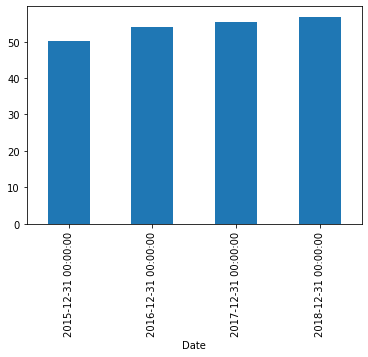

In [8]:
df["Close"].resample("A").mean().plot.bar()

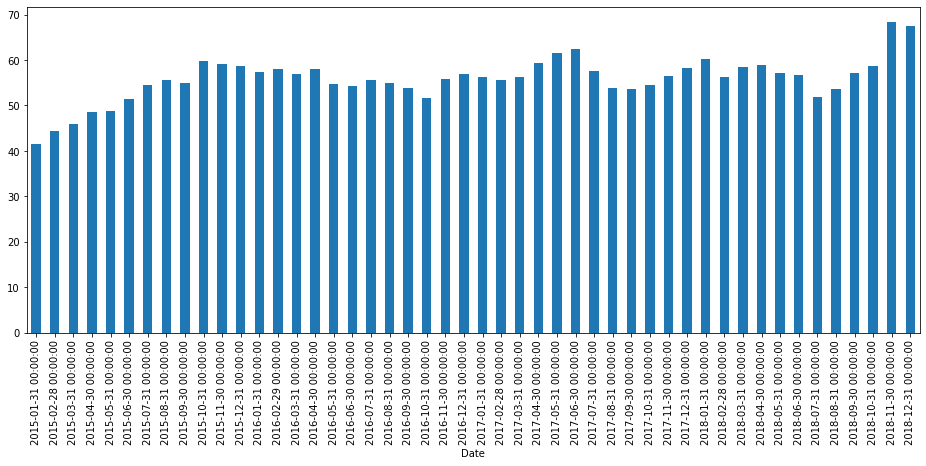

In [10]:
# monthly closing maximum
df["Close"].resample("M").max().plot.bar(figsize=(16, 6))

In [19]:
df = pd.read_csv("data/starbucks.csv", index_col="Date", parse_dates=True)

In [20]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [17]:
df.shift(1)
# df.head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [22]:
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [24]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [25]:
df.shift(periods=1, freq="M").head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [26]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


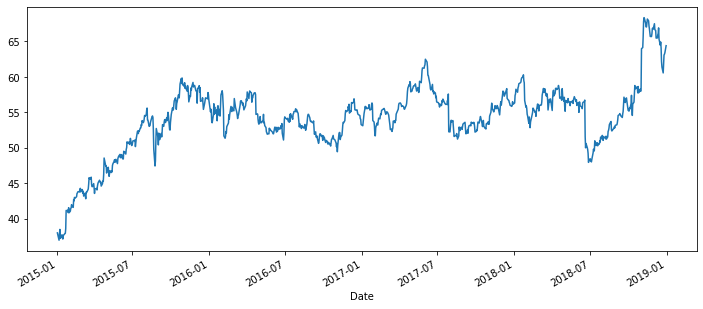

In [29]:
df["Close"].plot(figsize=(12, 5))

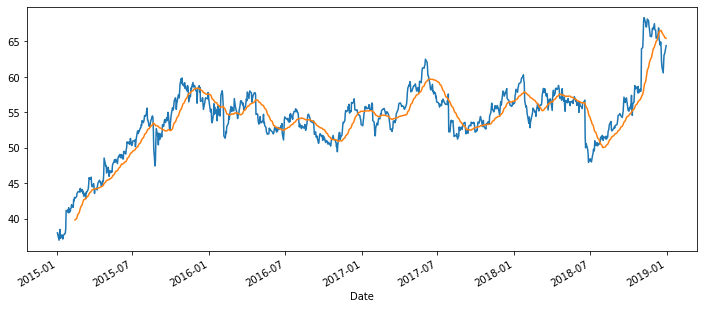

In [35]:
# rolling mean
df["Close"].plot(figsize=(12, 5))
df.rolling(window=30).mean()["Close"].plot()

In [40]:
df["Close: 30 Day Mean"] = df["Close"].rolling(window=30).mean()
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


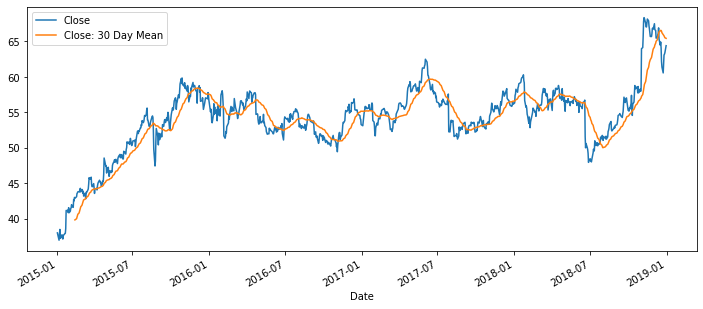

In [41]:
df[["Close", "Close: 30 Day Mean"]].plot(figsize=(12, 5))

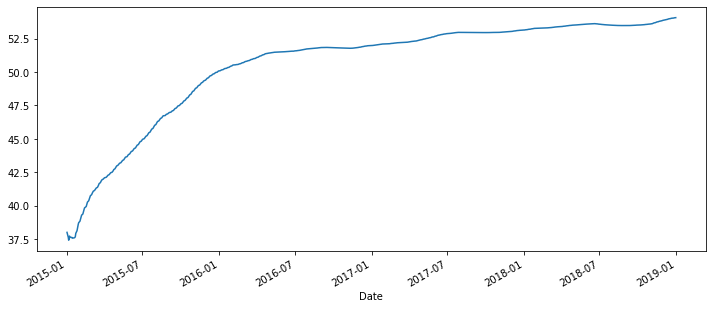

In [46]:
df["Close"].expanding().mean().plot(figsize=(12, 5))

#### Visualizing Time Series Data

In [48]:
df = pd.read_csv("data/starbucks.csv", index_col="Date", parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


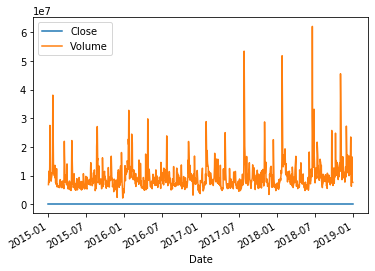

In [49]:
df.plot()

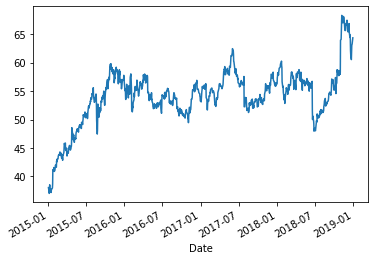

In [50]:
df["Close"].plot();

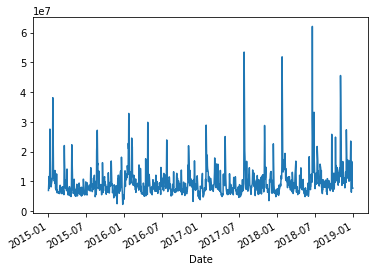

In [51]:
df["Volume"].plot();

[Text(0, 0.5, 'Y VALUE'), Text(0.5, 0, 'X VALUE')]

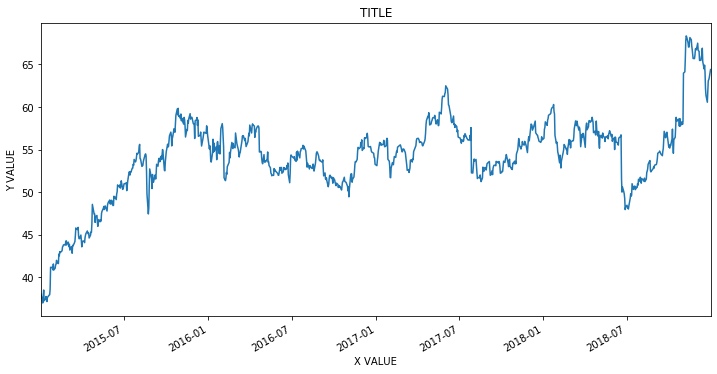

In [58]:
title = "TITLE"
xlabel = "X VALUE"
ylabel = "Y VALUE"
ax = df["Close"].plot(figsize=(12, 6), title=title)
ax.autoscale(axis="x", tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

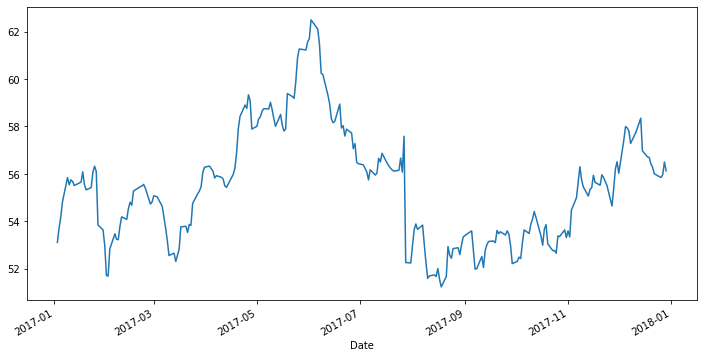

In [61]:
# option 1
df["Close"]["2017-01-01": "2017-12-31"].plot(figsize=(12, 6));

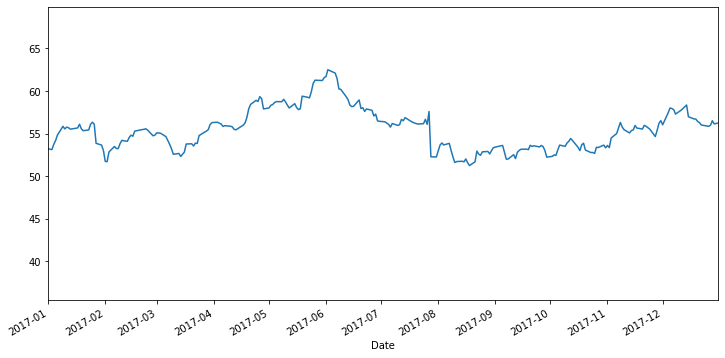

In [62]:
# option 2
df["Close"].plot(figsize=(12, 6), xlim=["2017-01-01", "2017-12-31"])

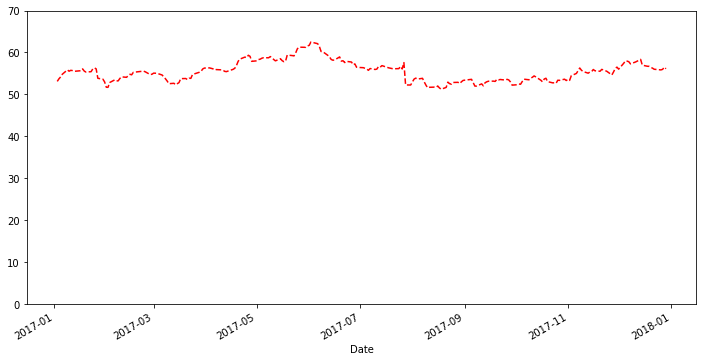

In [69]:
df["Close"]["2017-01-01": "2017-12-31"].plot(
    figsize=(12, 6), ylim=[0, 70],
    ls="--",
    c="red"
)

In [70]:
from matplotlib import dates

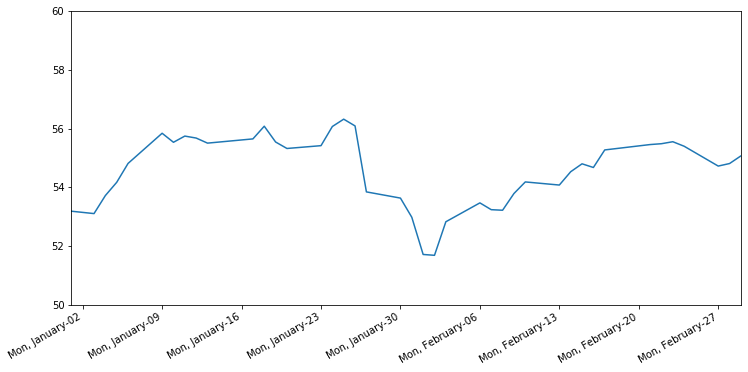

In [82]:
ax = df["Close"].plot(
        figsize=(12, 6), 
        xlim=["2017-01-01", "2017-03-01"], 
        ylim=[50, 60]
    )
ax.set(xlabel="")
# set xtick
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a, %B-%d"))

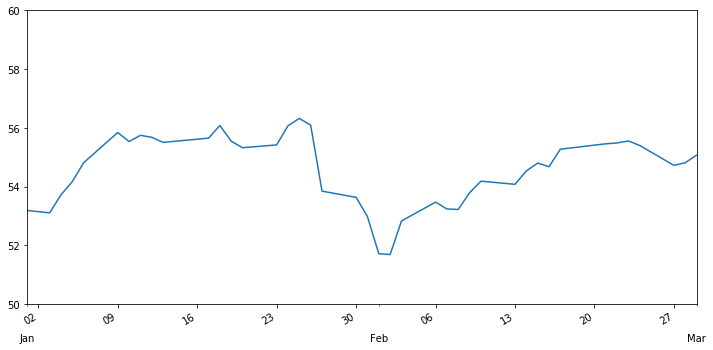

In [84]:
ax = df["Close"].plot(
        figsize=(12, 6), 
        xlim=["2017-01-01", "2017-03-01"], 
        ylim=[50, 60]
    )
ax.set(xlabel="")
# set major
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%d"))

# set minor
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("\n\n%b"))

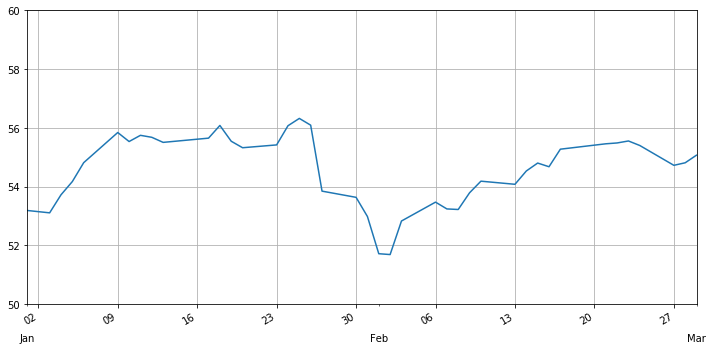

In [86]:
# grid lines
ax = df["Close"].plot(
        figsize=(12, 6), 
        xlim=["2017-01-01", "2017-03-01"], 
        ylim=[50, 60]
    )
ax.set(xlabel="")
# set major
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%d"))

# set minor
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter("\n\n%b"))

ax.yaxis.grid(True)
ax.xaxis.grid(True)